In [4]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as sm
import numpy as np
import math
%matplotlib inline

In [6]:
# Read in data
raw_df = pd.read_csv('../data/MERGED2016_17_PP.csv',
                     header=0,
                     low_memory=False)

raw_df = raw_df.append(pd.read_csv('../data/MERGED2015_16_PP.csv',
                     header=0,
                     low_memory=False))

raw_df = raw_df.append(pd.read_csv('../data/MERGED2014_15_PP.csv',
                     header=0,
                     low_memory=False))

raw_df = raw_df.append(pd.read_csv('../data/MERGED2013_14_PP.csv',
                     header=0,
                     low_memory=False))

In [7]:
div_adm = ["UNITID", "ADM_RATE","SAT_AVG", 
           "UGDS", "UGDS_WHITE",
           "UGDS_BLACK", "UGDS_HISP",
           "UGDS_ASIAN" #, 
           #"UGDS_AIAN",
           #"UGDS_NHPI"
          ]


In [8]:
# Remove majority/historic diverse schools
# Select demographics of interest
print(len(raw_df))
names = raw_df[(raw_df["HBCU"] == 1) | (raw_df["PBI"] == 1) | 
                  (raw_df["ANNHI"] == 1) | (raw_df["TRIBAL"] == 1) |
                  (raw_df["AANAPII"] == 1) | (raw_df["HSI"] == 1)]
names = names[['UNITID']]
# filtered = raw_df[(raw_df["HBCU"] == 0) & (raw_df["PBI"] == 0) & 
#                   (raw_df["ANNHI"] == 0) & (raw_df["TRIBAL"] == 0) &
#                   (raw_df["AANAPII"] == 0) & (raw_df["HSI"] == 0)]
print(len(raw_df))
filtered = raw_df[~raw_df['UNITID'].isin(names['UNITID'])]
#filtered = raw_df
print(len(filtered))

df = filtered[div_adm]
df = df.round(2)

df['buck_adm'] = pd.cut(df['ADM_RATE'], bins=10, precision=2)
df['buck_sat'] = pd.cut(df['SAT_AVG'], bins=15, precision=0)
df = df[['buck_adm', 'buck_sat', 'UGDS_BLACK', 'UGDS_WHITE', 'UGDS_ASIAN', 'UGDS_HISP']].dropna()
print(len(df))

30275
30275
27356
4458


In [53]:
#print(filtered['SAT_AVG'].dropna().head(20))

/Users/daohlim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5847: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)
/Users/daohlim/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


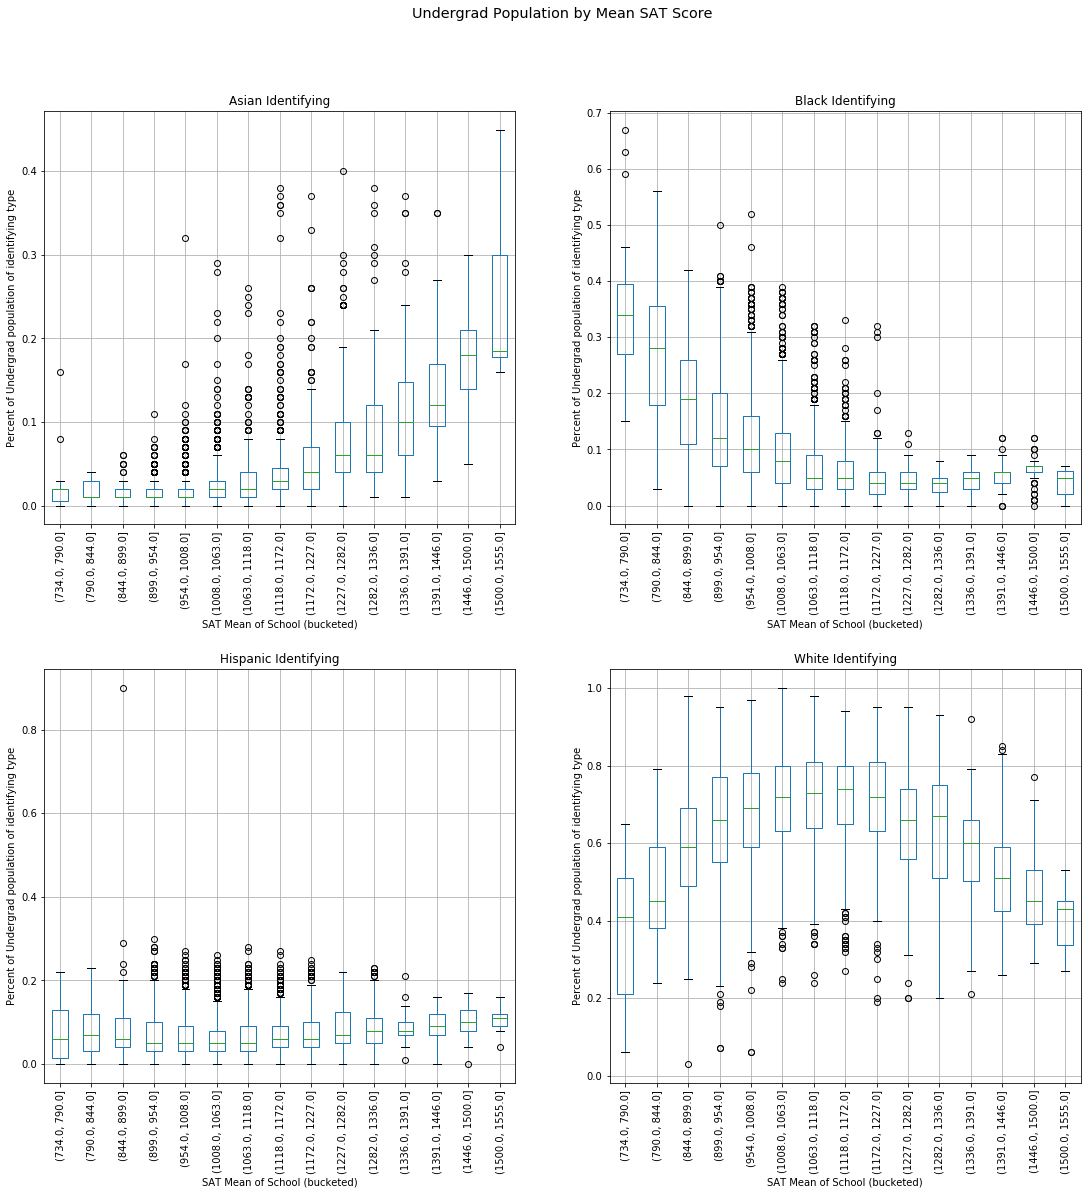

In [14]:
#df = df.groupby(['buck_adm']).count()
#df = df.reset_index()

fig, ax = plt.subplots(2,2, figsize=(18,18))

df.boxplot(by='buck_sat', ax=ax, rot=90)
fig.suptitle("Undergrad Population by Mean SAT Score", fontsize="x-large")
for a in ax:
    for b in a:
        b.set_xlabel('SAT Mean of School (bucketed)')
        b.set_ylabel('Percent of Undergrad population of identifying type')

ax[0][0].set_title('Asian Identifying')
ax[1][0].set_title('Hispanic Identifying')
ax[0][1].set_title('Black Identifying')
ax[1][1].set_title('White Identifying')
        
plt.subplots_adjust(hspace=0.35)

fig.savefig('sat_div.png')

/Users/daohlim/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:5847: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)
/Users/daohlim/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


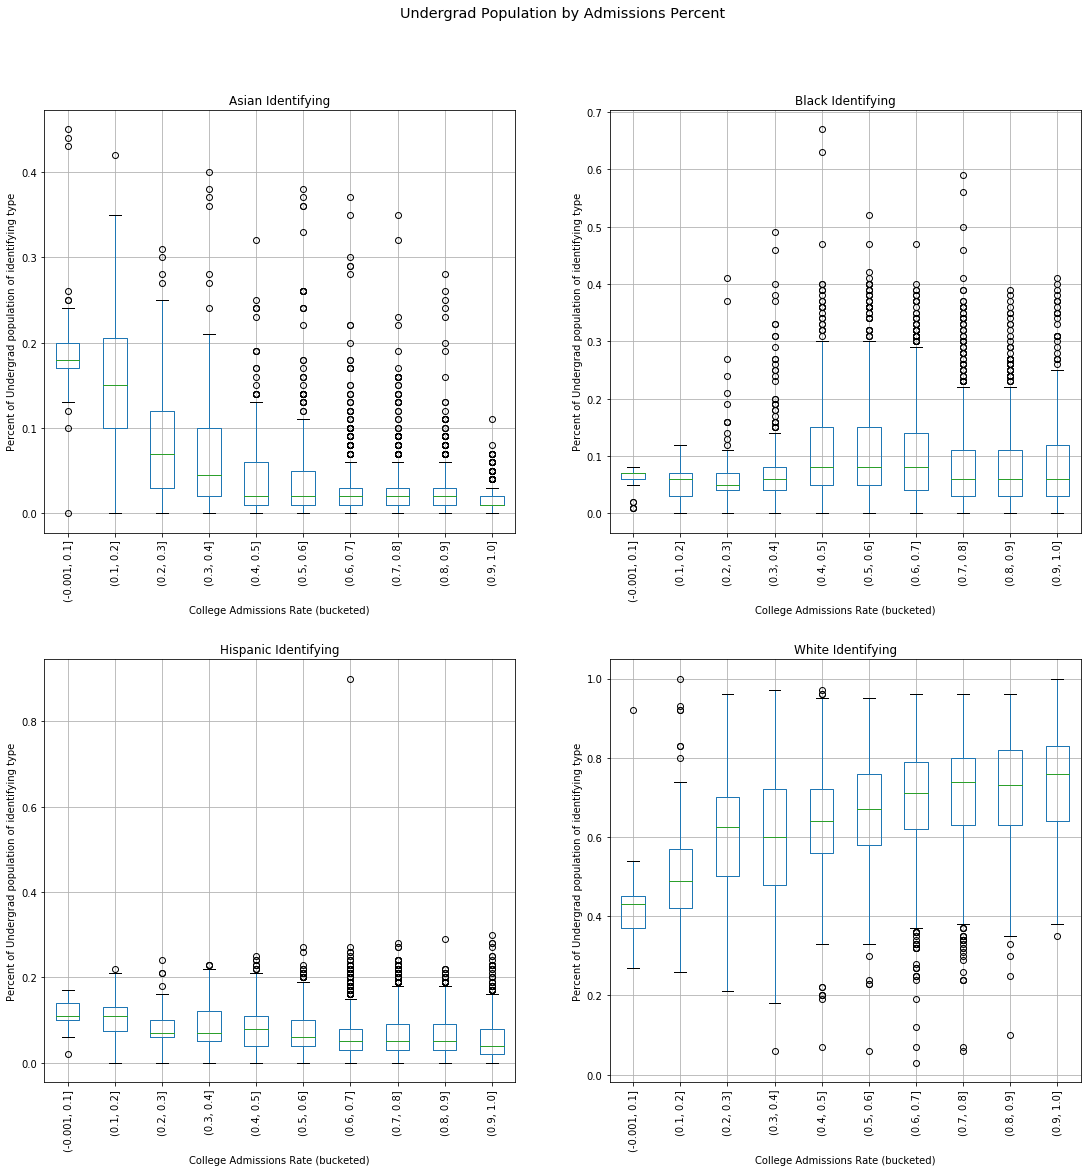

In [12]:
fig, ax = plt.subplots(2,2, figsize=(18,18))

df.boxplot(by='buck_adm', ax=ax, rot=90)
fig.suptitle("Undergrad Population by Admissions Percent", fontsize="x-large")
for a in ax:
    for b in a:
        b.set_xlabel('College Admissions Rate (bucketed)')
        b.set_ylabel('Percent of Undergrad population of identifying type')

ax[0][0].set_title('Asian Identifying')
ax[1][0].set_title('Hispanic Identifying')
ax[0][1].set_title('Black Identifying')
ax[1][1].set_title('White Identifying')
        
plt.subplots_adjust(hspace=0.3)


fig.savefig('adm_div.png')

In [30]:
#fig, ax = plt.subplots(2,2, figsize=(18,18))
#df.boxplot(by='buck_sat', ax=ax, rot=90)



#fig.savefig('sat_div.png')

In [31]:
# dfc = df[['buck_sat', 'UGDS_BLACK']].groupby('buck_sat').count()
# dfa = df[['buck_adm', 'UGDS_BLACK']].groupby('buck_adm').count()

# print(dfc.head(40))
# print(dfa.head(40))

Coeff of determination: 0.36925533524000653


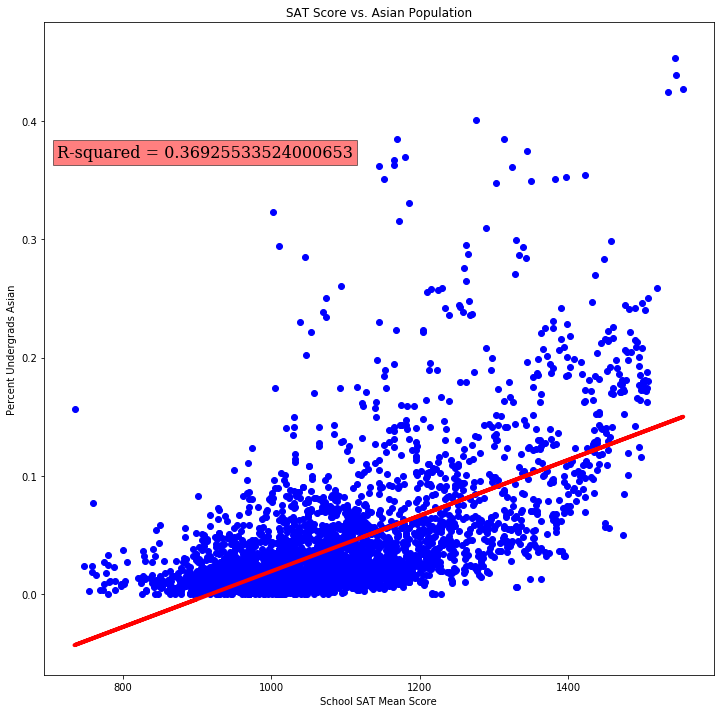

In [75]:
f = filtered[['ADM_RATE','SAT_AVG', 'UGDS_ASIAN']].dropna()
#X=f[['SAT_AVG', 'ADM_RATE']].values
X=f[['SAT_AVG']].values
Y=f[['UGDS_ASIAN']].values

lm=linear_model.LinearRegression()
lm.fit(X,Y)
print('Coeff of determination:',lm.score(X,Y))
#print('correlation is:',math.sqrt(lm.score(X,Y)))

fig, ax = plt.subplots(1, figsize=(12,12))

ax.scatter(X,Y, color='b')
ax.plot(X,lm.predict(X),color='r', linewidth=4)

ax.set_xlabel('School SAT Mean Score')
ax.set_ylabel('Percent Undergrads Asian')

ax.set_title('SAT Score vs. Asian Population')
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

plt.text(0.24,0.8, 'R-squared = {0}'.format(lm.score(X,Y)), 
        transform=ax.transAxes,
        horizontalalignment='center',
        verticalalignment='center',
        fontdict=font,
        bbox=dict(facecolor='red', alpha=0.5))

plt.savefig('linearfit.png')

In [76]:
completion = ["UNITID", "ADM_RATE","SAT_AVG",
              "C150_4_WHITE", "C150_4_BLACK", "C150_4_HISP", "C150_4_ASIAN"]

df_compl = filtered[completion]
print(len(df_compl))
df_compl = df_compl.dropna()
print(len(df_compl))

df_compl['buck_adm'] = pd.cut(df_compl['ADM_RATE'], bins=10, precision=2)
df_compl['buck_sat'] = pd.cut(df_compl['SAT_AVG'], bins=15, precision=0)

27356
3807


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a0c0550>,
      dtype=object)

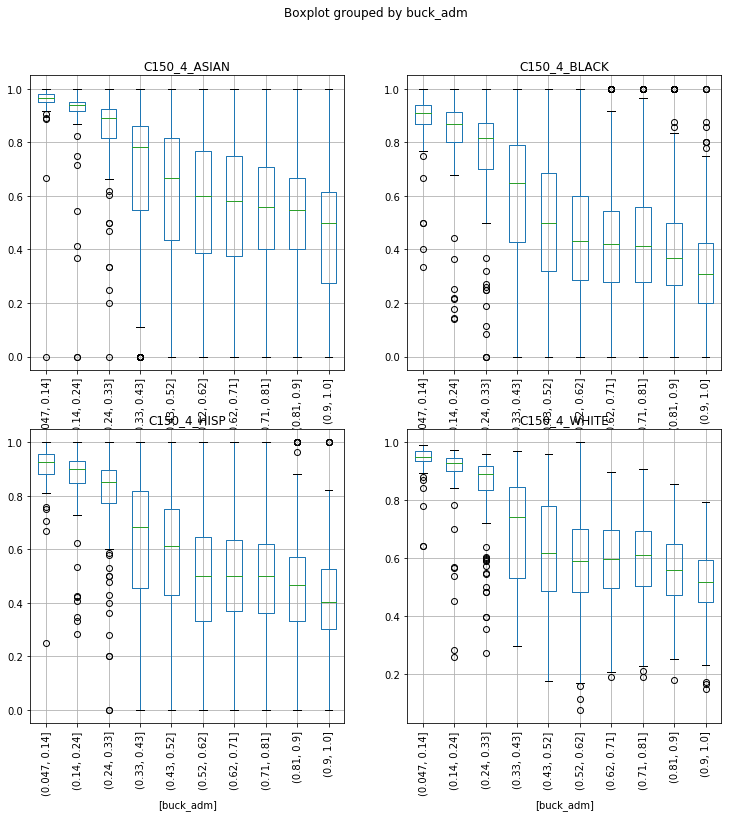

In [77]:
dfa = df_compl[['buck_adm', "C150_4_WHITE", "C150_4_BLACK", "C150_4_HISP", "C150_4_ASIAN"]]
dfb = df_compl[['buck_sat', "C150_4_WHITE", "C150_4_BLACK", "C150_4_HISP", "C150_4_ASIAN"]]

fig, ax = plt.subplots(2,2, figsize=(12,12))
dfa.boxplot(by='buck_adm', ax=ax, rot=90)

In [78]:
# fig, ax = plt.subplots(2,2, figsize=(18,18))
# df.plot.scatter('ADM_RATE', 'C150_4_WHITE', ax=ax[0][0])
# df.plot.scatter('ADM_RATE', 'C150_4_BLACK', ax=ax[0][1])
# df.plot.scatter('ADM_RATE', 'C150_4_ASIAN', ax=ax[1][0])
# df.plot.scatter('ADM_RATE', 'C150_4_HISP', ax=ax[1][1])


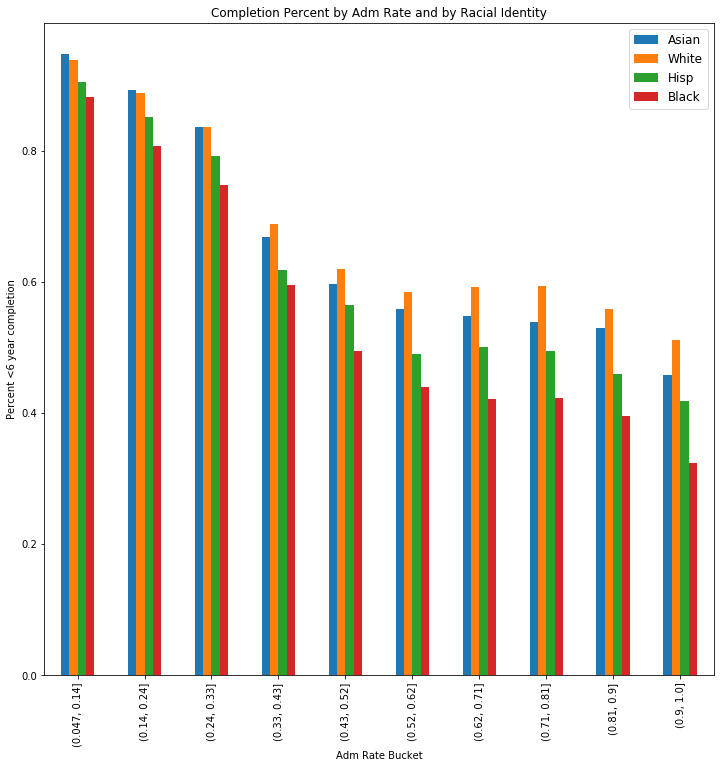

In [82]:
df1 = df_compl[['buck_adm', 'C150_4_ASIAN']].groupby('buck_adm').mean()
df2 = df_compl[['buck_adm', 'C150_4_WHITE']].groupby('buck_adm').mean()
df3 = df_compl[['buck_adm', 'C150_4_HISP']].groupby('buck_adm').mean()
df4 = df_compl[['buck_adm', 'C150_4_BLACK']].groupby('buck_adm').mean()

means = df1.join(df2).join(df3).join(df4)
fig, ax = plt.subplots(figsize=(12,12))

means.plot.bar(ax=ax)

ax.set_title('Completion Percent by Adm Rate and by Racial Identity')
ax.set_xlabel('Adm Rate Bucket')
ax.set_ylabel('Percent <6 year completion')
ax.legend(["Asian", "White", "Hisp", "Black"], prop={'size': 12})

plt.savefig('completion.png')
# fig, ax = plt.subplots(2,2, figsize=(18,18))
# df1.plot.bar(ax=ax[0][0])
# df2.plot.bar(ax=ax[0][1])
# df3.plot.bar(ax=ax[1][0])
# df4.plot.bar(ax=ax[1][1])